<a href="https://colab.research.google.com/github/IsaMoral/TyDconPython/blob/main/Test_earthing_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install earthing

In [39]:
from math import *
import numpy as np
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
from earthing import *

import gc
gc.collect()
matplotlib.pyplot.close('all')

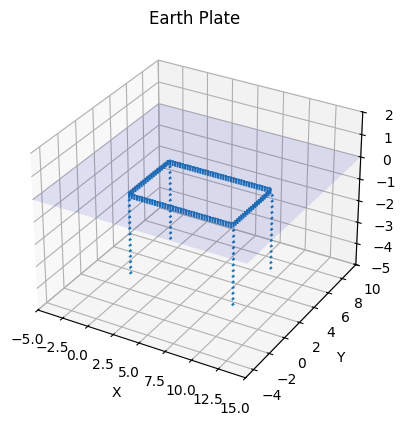

In [55]:
# define i/p parameters
strip_width = 0.05
radius_rod = 0.04  # Vertical earth strip for earth plate
h = 0.8
h_p = 3
Lx = 10
Ly = 5
Lr = 3.6
Nx = 2
Ny = 2

rho = 150
xlim=(-5, Lx+5)
ylim=(-5, Ly+5)
zlim=(-5, 2)
grid=(50,50)
delta=0.2
Ig = 1000

# Define network
network1 = Network(rho, Ig)
network1.add_mesh([0,0,-h], Lx, Ly, Nx, Ny, strip_width)
network1.add_rod([0,0,-h], radius_rod, Lr)
network1.add_rod([Lx,0,-h], radius_rod, Lr)
network1.add_rod([0,Ly,-h], radius_rod, Lr)
network1.add_rod([Lx,Ly,-h], radius_rod, Lr)


# Generate model
network1.generate_model(desc_size=0.25)
network1.solve_model()
network1.plot_geometry_3d(xlim=xlim, ylim=ylim, zlim=zlim, ground=True, ground_pot=False, current_distribution=False,
                          normal=True,normal_scale=0.25,title='Earth Plate')



Value of earth resistance =  [6.971]  Ohm


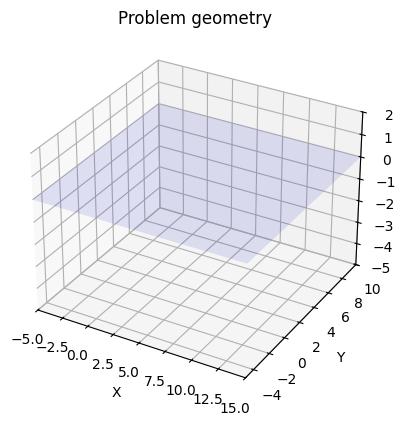

In [57]:
# Solve network
network1.solve_model()
res = network1.get_resistance()
# display results
print('Value of earth resistance = ', str(res),' Ohm')
network1.plot_geometry_3d(xlim=xlim, ylim=ylim, zlim=zlim, ground=True, ground_pot=False, current_distribution=False)


In [5]:
network.solve_model()
res = network.get_resistance()
# display results
print('Value of earth resistance = ', str(res),' Ohm')

Value of earth resistance =  [2.641]  Ohm


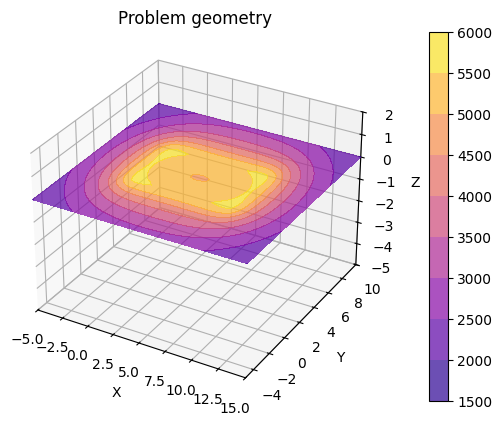

/usr/local/lib/python3.11/dist-packages/earthing/__init__.py:1097: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 3 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scat_plot, pad=0.1)


<Figure size 640x480 with 0 Axes>

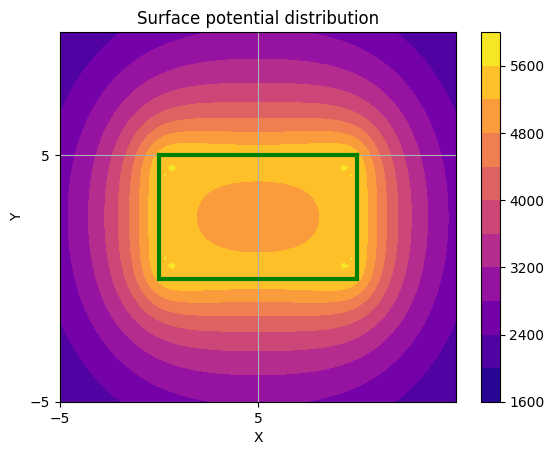

In [59]:
network1.solve_surface_potential_fast(grid=grid, xlim=xlim, ylim=ylim)
network1.plot_geometry_3d(xlim=xlim, ylim=ylim, zlim=zlim, ground=False, ground_pot=True, current_distribution=True)
network1.plot_surface_potential(xlim=xlim, ylim=ylim, grid_spacing=10)

In [62]:
network1.gpr()

array([6971.372])

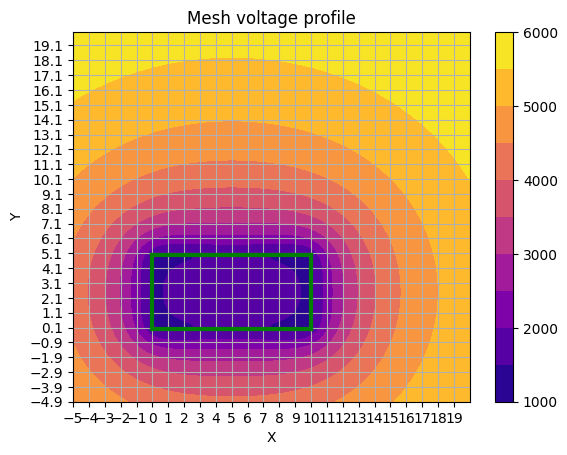

5931.251  @  [20. 20.]


In [64]:
# Mesh voltage
polygon = [(-5,-5),(20,-5),(20,20),(-5,20),(-5,-5)]
Em_loc, Em = network1.mesh_voltage(polygon, plot=True)
print(Em, ' @ ', Em_loc)

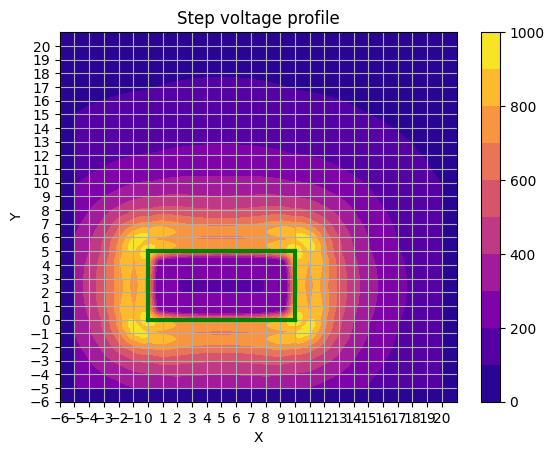

957.487  @  [10.768 -0.742]


In [66]:
# Step voltage
polygon = [(-5,-5),(20,-5),(20,20),(-5,20),(-5,-5)]
Es_loc, Es = network1.step_voltage(polygon, plot=True)
print(Es, ' @ ', Es_loc)